190
(0, 1)
Emb -40.49338713790425
EmbO -20.493387137904172
(0, 2)
Emb -40.451522578908104
EmbO -20.451522578908047
(0, 3)
Emb -40.332560790995785
EmbO -20.3325607909957
(0, 4)
Emb -40.3196294350776
EmbO -20.319629435077655
(0, 5)
Emb -40.243506204939266
EmbO -20.243506204939223
(0, 6)
Emb -40.06719161359707
EmbO -20.067191613596954
(0, 7)
Emb -40.033070283381306
EmbO -20.03307028338122
(0, 8)
Emb -39.9747144181317
EmbO -19.974714418131676
(0, 9)
Emb -39.900097809824665
EmbO -19.900097809824604
(0, 10)
Emb -39.76954484872376
EmbO -19.769544848723648
(0, 11)
Emb -39.18954647477006
EmbO -19.189546474770047
(0, 12)
Emb -39.172891029955274
EmbO -19.172891029955217
(0, 13)
Emb -39.084629875815494
EmbO -19.084629875815406
(0, 14)
Emb -39.05301396180111
EmbO -19.053013961801188
(0, 15)
Emb -38.99870685840591
EmbO -18.99870685840598
(0, 16)
Emb -38.97632154728909
EmbO -18.976321547289146
(0, 17)
Emb -38.950520035552
EmbO -18.95052003555201
(0, 18)
Emb -38.894631398337125
EmbO -18.89463139833709

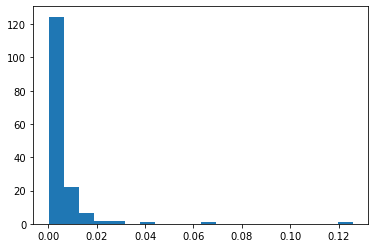

In [45]:
import numpy as np
import scipy.linalg as LA
import random
import itertools
import operator
import cmath
import math
from tqdm import tqdm
import matplotlib.pyplot as plt


def lat_to_num(lat,L,dim):

    dd=1
    num=0
    for l in lat:
        num+=l*L**(dim-dd)
        dd+=1
    return num
    
def num_to_lat(num,L,dim):

    n=num
    lat=[]
    for d in range(dim,0,-1):
        if d==1:
            lat.append(n%L)
        else:
            dn=(n//L**(d-1))
            lat.append(dn)
            n-=dn*L**(d-1)
    return lat
   
def dist(lat1,lat2,L):
    period=True
    l=0
    for i in range(len(lat1)):
        if period:
            ll=lat1[i]-lat2[i]
            if abs(ll)==L-1:
                ll=1
        else:
            ll=lat1[i]-lat2[i]
        l+=(ll)**2
        
    return l

def nn(lat1,lat2,L):
    if dist(lat1,lat2,L)==1:
        return True
    else:
        return False

def AM(W,dim,L):
    val=[]
    for num in range(L**dim):
        val.append([0]*L**dim)
    for num1 in range(L**dim):
        for num2 in range(num1,L**dim):
            if num1==num2:
                val[num1][num1]=random.uniform(-W/2,W/2)
            else:
                lat1=num_to_lat(num1,L,dim)
                lat2=num_to_lat(num2,L,dim)
#                print(num1,num2,nn(lat1,lat2,L))
                if nn(lat1,lat2,L):
                    val[num1][num2]=-1
                    val[num2][num1]=-1
    return val

def mixsort2(ea,av,eb,bv):
    
    emin=10**5
    ia=0
    ib=0
    e=[]
    vec=[]
    for i in range(len(ea)+len(eb)):
        if ia<len(ea):
            if ea[ia]<eb[ib]:
                e.append(ea[ia])
                vec.append(av[ia])
                ia+=1
            else:
                e.append(eb[ib])
                vec.append(bv[ib])
                ib+=1  
    
    np.array(vec)
    return e,vec

def mixsort1(ea,av):
    
    emin=10**5
    e=ea
    eo=[]
    vo=[]
    for i in range(len(ea)):
        arg=np.argmin(e)
        eo.append(ea[arg])
        vo.append(av[arg])
        e.pop(arg)
    
    np.array(vo)
    return eo,vo

def mixsort(ea,av,eb,bv,cv,dv):
    
    emin=10**5
    ia=0
    ib=0
    e=[]
    vec=[]
    eo=[]
    sign=[]
    for i in range(len(ea)+len(eb)):
        if ia<len(ea):
            if ea[ia]<eb[ib]:
                e.append(ea[ia])
                vec.append(av[ia])
                eo.append(cv[ia])
                sign.append(+1)
                ia+=1
            else:
                e.append(eb[ib])
                vec.append(bv[ib])
                eo.append(dv[ib])
                sign.append(-1)
                ib+=1  
    
    np.array(vec)
    np.array(eo)
    return e,vec,eo,sign

def hermitian(arr):
    arr=np.array(arr)
    return np.conjugate(arr.T)

def chain(l_2d):
    
    return list(itertools.chain.from_iterable(l_2d))
        
dim=5
L=4
W=10.0
Ne=2
Nmax=20
U=10

#Create AM
H0=AM(W,dim,L)
H0=np.array(H0)

#Solve one body problem
l,v=LA.eigh(H0)
    
#for n in range(len(v)):
#    print(v.T@v)

#iv=LA.inv(v)
#print(iv@a@v)

#print('eigvec',v)
#print('eigval',l)

#copy to spin-1/2
vup=[]
vdown=[]
for vec in v:
    vup.append(vec)
    vdown.append(vec)
    
#degeneracy problem
Hsp=[]
for i in range(len(vup)):
#    print(cc)
    Uij=0
    for j in range(len(vup[i])):    
        Uij+=vup[i][j]*U*vdown[i][j]
        
    Hsp.append([[0,Uij],[np.conjugate(Uij),0]])
Hsp=np.array(Hsp)

#Solve the degeneracy
lspup=[]
vspup=[]
lspdown=[]
vspdown=[]
lsoup=[]
lsodown=[]
for i,h in enumerate(Hsp):
#    print('h',h)
    a,b=LA.eigh(h)
    lspup.append(l[i]+a[0])
    lsoup.append(l[i])
    vspup.append(v[i]*(b[0][0]+b[0][1]))
    lspdown.append(l[i]+a[1])
    lsodown.append(l[i])
    vspdown.append(v[i]*(b[1][0]+b[1][1]))
#print('Etest',Etest)
#print('lspup',lspup)
#print('lspdown',lspdown)

#print('lspdown',lspdown)
#print('lspup',lspup)

#Sort eigenvalue and eigenvectors
be,bv,bo,sign=mixsort(lspup,vspup,lspdown,vspdown,lsoup,lsodown)

c=list(itertools.combinations(list(range(Nmax)),Ne))
print(len(c))

#Create excited state basis
c=list(itertools.combinations(list(range(Nmax)),Ne))
mbv=[1]*len(c)
Emb=[0]*len(c)
EmbO=[0]*len(c)
spin=[[]]*len(c)
for i,cc in enumerate(c):
    for j in cc:
        mbv[i]*=bv[j]
        Emb[i]+=be[j]
        EmbO[i]+=bo[j]
        spin[i].append(sign[j])
        
for i,cc in enumerate(c):
    print(cc)
#    print('spin',spin[i])
    print('Emb',Emb[i])
    print('EmbO',EmbO[i])

Emb.sort()
    
dE=[]
for i in range(len(c)-1):
    dE.append(Emb[i+1]-Emb[i])

dE=len(dE)*dE/sum(dE)   

plt.figure()
plt.hist(dE,bins=20,density=True)
plt.show()